# Czesc Tutorialowa

In [12]:
import numpy as np
import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [14]:
print(images[0].shape)

(28, 28)


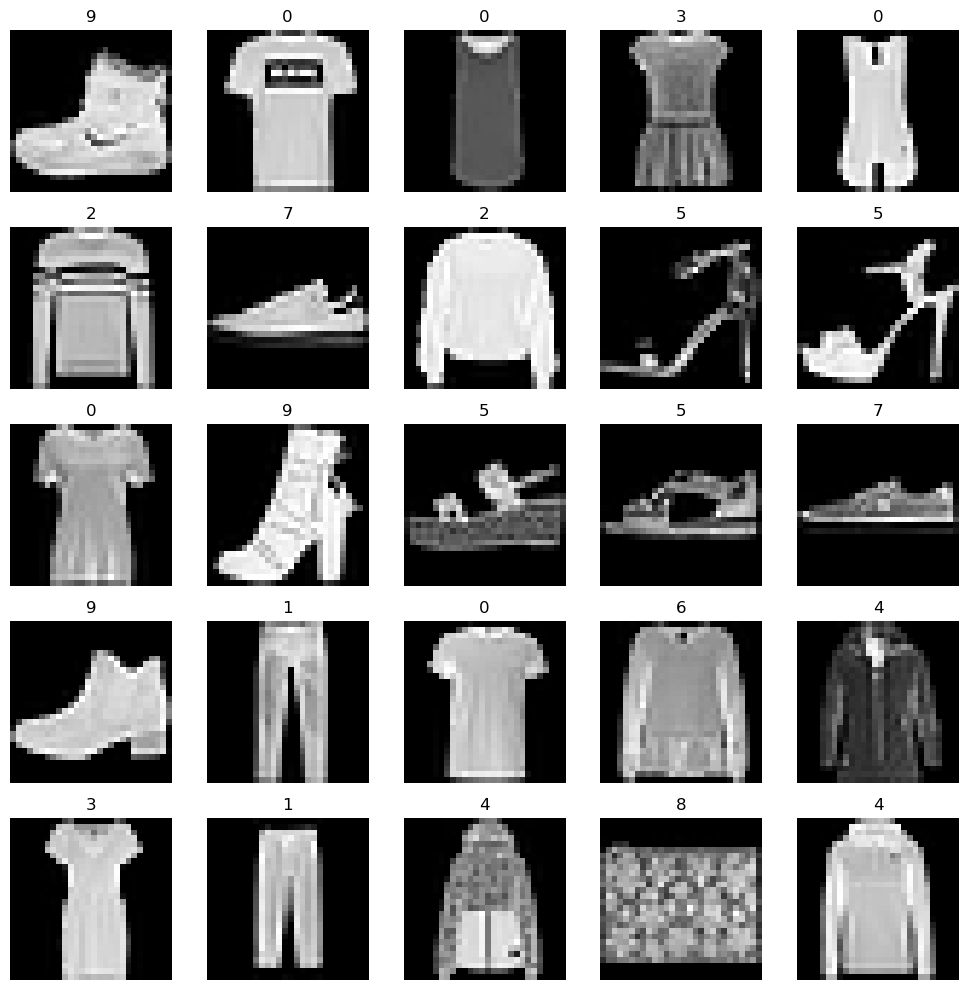

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):  
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"{labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
print(labels[0:10])

[9 0 0 3 0 2 7 2 5 5]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [ ]:
from tensorflow.keras import layers
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Input(shape=[28, 28]),
    layers.Flatten(),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

In [ ]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
f_mnist_model.summary()

In [ ]:
train_stats = f_mnist_model.fit(train_ds, epochs=10, verbose=1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = f_mnist_model.predict(X_test)
print("proba : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

# Zadanie 18_4

Function to save the trained models

In [38]:
import os
import json
from datetime import datetime
import joblib  # for scikit-learn models
# import torch  # uncomment for PyTorch models
# import tensorflow as tf  # uncomment for TensorFlow models

def save_model(model, project_name, model_type, metrics=None, hyperparameters=None, framework="sklearn"):
    """
    Save a trained model with metadata using a consistent directory structure.
    
    Parameters:
    -----------
    model : trained model object
        The model to save
    project_name : str
        Name of the project
    model_type : str
        Type of model (e.g., "random_forest", "cnn", "lstm")
    metrics : dict, optional
        Performance metrics (e.g., {"accuracy": 0.95, "f1": 0.94})
    hyperparameters : dict, optional
        Model hyperparameters
    framework : str, optional
        ML framework used ("sklearn", "pytorch", "tensorflow")
    
    Returns:
    --------
    str
        Path to the saved model directory
    """
    # Create timestamp for version
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create directory structure
    base_dir = os.path.join("models", project_name, model_type, f"version_{timestamp}")
    os.makedirs(base_dir, exist_ok=True)
    
    # Save the model
    model_path = os.path.join(base_dir, "model")
    if framework == "sklearn":
        joblib.dump(model, model_path + ".pkl")
    elif framework == "pytorch":
        torch.save(model.state_dict(), model_path + ".pth")
    elif framework == "tensorflow":
        model.save(model_path + ".h5")
    
    # Save metrics if provided
    if metrics:
        with open(os.path.join(base_dir, "metrics.json"), "w") as f:
            json.dump(metrics, f, indent=4)
    
    # Save hyperparameters if provided
    if hyperparameters:
        with open(os.path.join(base_dir, "hyperparameters.json"), "w") as f:
            json.dump(hyperparameters, f, indent=4)
    
    print(f"Model saved to {base_dir}")
    return base_dir

In [40]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [42]:
X_train[0:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(1000)

In [ ]:
from tensorflow.keras import layers
f_mnist_model_v2 = tf.keras.Sequential([
    # Input layer
    layers.Input(shape=(28, 28)),

    # Reshape layer to add channel dimension
    layers.Reshape((28, 28, 1)),
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    
    # Output layer
    layers.Dense(10, activation='softmax')
])

In [ ]:
f_mnist_model_v2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
f_mnist_model_v2.summary()

In [ ]:
train_stats_v2 = f_mnist_model_v2.fit(train_ds, epochs=10, verbose=1)

In [ ]:
loss, accuracy = f_mnist_model_v2.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
metrics = {"accuracy": accuracy}

In [ ]:
y_predictions_f_mnist_model_v2 = f_mnist_model_v2.predict(X_test)

In [ ]:
y_predictions_classes_f_mnist_model_v2 = np.argmax(y_predictions_f_mnist_model_v2, axis=1)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predictions_classes_f_mnist_model_v2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
save_model(
    model=f_mnist_model_v2,
    project_name="Zadanie_18_4",
    model_type="neural_network_with_optimizer_Adam",
    metrics=metrics,
    hyperparameters={"epochs": 10},
    framework="sklearn"
)

## Model AdamW

In [ ]:
f_mnist_model_v3 = tf.keras.Sequential([
    # Input layer
    layers.Input(shape=(28, 28)),

    # Reshape layer to add channel dimension
    layers.Reshape((28, 28, 1)),
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    
    # Output layer
    layers.Dense(10, activation='softmax')
])

In [ ]:
f_mnist_model_v3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adamW',
    metrics=['accuracy']
)

In [ ]:
train_stats_v3 = f_mnist_model_v3.fit(train_ds, epochs=10, verbose=1)

In [ ]:
loss, accuracy = f_mnist_model_v3.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

In [ ]:
y_predictions_f_mnist_model_v3 = f_mnist_model_v3.predict(X_test)

In [ ]:
y_predictions_classes_f_mnist_model_v3 = np.argmax(y_predictions_f_mnist_model_v3, axis=1)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predictions_classes_f_mnist_model_v3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
metrics = {"accuracy": accuracy}

In [ ]:
save_model(
    model=f_mnist_model_v3,
    project_name="Zadanie_18_4",
    model_type="neural_network_with_optimizer_AdamW",
    metrics=metrics,
    hyperparameters={"epochs": 10},
    framework="sklearn"
)

## Model AdamW with more epochs (10 --> 100)

In [ ]:
from tensorflow.keras.models import clone_model
f_mnist_model_v4 = clone_model(f_mnist_model_v3) # clone the model without weigths

In [ ]:
f_mnist_model_v4.compile(
    optimizer='adamW',  
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']  
)

In [ ]:
train_stats_v4 = f_mnist_model_v4.fit(train_ds, epochs=100, verbose=1)

In [ ]:
loss, accuracy = f_mnist_model_v4.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Pomimo ze mamy doskonala dokladnosc na zbiorze treningowym to dokladnosc na zbiorze testowym sie praktycznie nie zmienila

In [ ]:
metrics = {"accuracy": accuracy}

In [ ]:
save_model(
    model=f_mnist_model_v3,
    project_name="Zadanie_18_4",
    model_type="neural_network_with_optimizer_AdamW",
    metrics=metrics,
    hyperparameters={"epochs": 100},
    framework="sklearn"
)

## Data augmentation

In [ ]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Data augmentation with more modest parameters
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.01),                # Reduced rotation
    layers.RandomTranslation(0.03, 0.03),       # Reduced translation
    layers.RandomZoom(0.02),                    # Small zoom for more diversity
])    

# Simplified model with stronger regularization
improved_model = tf.keras.Sequential([
    # Input layers
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    
    # Augmentation layer (only applied during training)
    data_augmentation,
    
    # First convolutional block - simplified
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', 
                 kernel_regularizer=regularizers.l2(0.0005)),  # Stronger L2
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),  # Light dropout early
    
    # Second convolutional block - reduced complexity
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Third convolutional block - reduced filters
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                 kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Flatten and dense layers - significantly simplified
    layers.Flatten(),
    layers.Dense(128, activation='relu', 
                kernel_regularizer=regularizers.l2(0.001)),  # Stronger regularization
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Heavy dropout before output
    
    # Output layer
    layers.Dense(10, activation='softmax')
])

# Compile with reduced learning rate and added decay
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, decay=1e-6)
improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Add early stopping callback for training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Add learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)

In [ ]:
history_v2 = improved_model.fit(
    train_ds,  
    validation_data=(X_test, y_test),
    epochs=100,            
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

In [ ]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Enhanced data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.05),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomZoom(0.05),
])

# Simplified model with reduced regularization
improved_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
#    data_augmentation,
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile with higher learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate reduction callback (monitor training loss)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)

# Assuming Fashion MNIST data is loaded and normalized
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Train the model
history = improved_model.fit(
    train_ds,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),  # Using test set as validation for monitoring
    callbacks=[reduce_lr]
)

### Model with augumented data: Rotation +-5 deg

In [ ]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Enhanced data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.05),
#    layers.RandomTranslation(0.05, 0.05),
#    layers.RandomZoom(0.05),
])

# Simplified model with reduced regularization
improved_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    data_augmentation,
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile with higher learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate reduction callback (monitor training loss)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)

# Assuming Fashion MNIST data is loaded and normalized
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Train the model
history = improved_model.fit(
    train_ds,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),  # Using test set as validation for monitoring
    callbacks=[reduce_lr]
)

### Model with augumented data: Rotation +-1,.15 deg, Brightnes +-10%, Contract +-10%

In [ ]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Enhanced data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.02), # 0.02 radians ≈ 1.15 degrees
    # Brightness adjustment
    layers.RandomBrightness(factor=0.1),  # Adjusts brightness by ±10%
    
    # Contrast adjustment
    layers.RandomContrast(factor=0.1),  # Adjusts contrast by ±10%
])

# Simplified model with reduced regularization
improved_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    data_augmentation,
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile with higher learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate reduction callback (monitor training loss)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)

# Assuming Fashion MNIST data is loaded and normalized
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Train the model
history = improved_model.fit(
    train_ds,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),  # Using test set as validation for monitoring
    callbacks=[reduce_lr]
)

### Model with augumented data: Rotation +-0.65 deg, Brightnes +-5%, Contract +-5% and smaller dropout

In [ ]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Enhanced data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.01), 
    # Brightness adjustment
    layers.RandomBrightness(factor=0.05), 
    
    # Contrast adjustment
    layers.RandomContrast(factor=0.05),  
])

# Simplified model with reduced regularization
improved_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    data_augmentation,
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile with higher learning rate
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    clipnorm=1.0
)

improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate reduction callback (monitor training loss)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.1,
    patience=8,
    min_lr=0.00001,
    verbose = 1
)

# Assuming Fashion MNIST data is loaded and normalized
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Train the model
history = improved_model.fit(
    train_ds,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),  # Using test set as validation for monitoring
    callbacks=[reduce_lr]
)

### Model with augumented data: Rotation +-0.65 deg, Brightnes +-5%, Contract +-5% and smaller dropout, with more complex model

In [ ]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

# Enhanced data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.01), 
    # Brightness adjustment
    layers.RandomBrightness(factor=0.05), 
    
    # Contrast adjustment
    layers.RandomContrast(factor=0.05),  
])

improved_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    data_augmentation,
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',  # Added second conv
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',  # Added second conv
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    
    # Third convolutional block (new)
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu',  # Increased from 128
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu',  # Added second dense layer
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile with higher learning rate
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    clipnorm=1.0
)

improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate reduction callback (monitor training loss)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.1,
    patience=8,
    min_lr=0.00001,
    verbose = 1
)

# Assuming Fashion MNIST data is loaded and normalized
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Train the model
history = improved_model.fit(
    train_ds,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),  # Using test set as validation for monitoring
    callbacks=[reduce_lr]
)

Model trenuje sie bardzo wolno, dlatego zastopowalem trening

### Model with improvement sugestions from Grok 3 & Claude 3.7

Ponowne sprawdzenie czy wymiary zdjec sa znormalizowane = czy wartosci pixeli sa znormalizowane

In [ ]:
import tensorflow as tf

for images, labels in train_ds.take(1):  # Take 1 batch
    print("Training data min:", tf.reduce_min(images).numpy())
    print("Training data max:", tf.reduce_max(images).numpy())

In [ ]:
print("Validation data min:", X_test.min())
print("Validation data max:", X_test.max())

#### Model bez data augumentation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

# Temporarily disable data augmentation
#data_augmentation = tf.keras.Sequential([
#     layers.RandomBrightness(0.05),
#     layers.RandomContrast(0.05),
#])

# Define the improved model
improved_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    #data_augmentation,  
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Fourth convolutional block (new)
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Dense layers with increased capacity
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

# Compile with lower learning rate
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,  # Reduced from 0.002
    clipnorm=1.0
)
improved_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (unchanged)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=0.00001,
    verbose=1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train with smaller batch size
history = improved_model.fit(
    train_ds,
    epochs=100,
    batch_size=128,  # Reduced from 256
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stopping]
)

# Plot results
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

#### Model z data augumentation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

data_augmentation_best = tf.keras.Sequential([
    layers.RandomRotation(0.02),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomFlip("horizontal")
])

# Define the improved model
best_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    data_augmentation_best,  
    
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Fourth convolutional block 
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Dense layers with increased capacity
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

# Compile with lower learning rate
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, 
    clipnorm=1.0
)
best_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=0.00001,
    verbose=1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history_best = best_model.fit(
    train_ds,
    epochs=100,
    batch_size=128,  
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stopping]
)

# Plot results
import matplotlib.pyplot as plt
plt.plot(history_best.history['accuracy'], label='Training Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [2]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
metrics = {"accuracy": accuracy}
save_model(
    model=best_model,
    project_name="Zadanie_18_4",
    model_type="neural_network_with_optimizer_Adam",
    metrics=metrics,
    hyperparameters={"epochs": 100},
    framework="sklearn"
)

NameError: name 'best_model' is not defined

In [4]:
import joblib
import tensorflow as tf # Make sure TF is imported *before* loading
import os


project_name = "Zadanie_18_4"
model_type = "neural_network_with_optimizer_Adam" # Or the type you used
# Find the latest version directory (or specify the exact timestamp)
base_model_dir = os.path.join("models", project_name, model_type)

try:
    versions = [d for d in os.listdir(base_model_dir) if os.path.isdir(os.path.join(base_model_dir, d)) and d.startswith("version_")]
    versions.sort(reverse=True) # Sort descending to get latest first
    latest_version_dir = versions[0]
    model_directory = os.path.join(base_model_dir, latest_version_dir)
    # Assuming the save_model function saved it as 'model.pkl'
    model_path_pkl = os.path.join(model_directory, "model.pkl") # <--- Changed extension
    print(f"Attempting to load model from: {model_path_pkl}")
except (FileNotFoundError, IndexError):
    print(f"Error: Could not find saved model directories in {base_model_dir}")
    print("Please set 'model_path_pkl' manually to the correct .pkl file.")
    model_path_pkl = "path/to/your/model/version_folder/model.pkl" # Placeholder - CHANGE THIS

# --- Load the model using joblib ---
try:
    # Use joblib.load() for .pkl files
    loaded_best_model = joblib.load(model_path_pkl)

    # --- Assign it back to the name expected by the Gradio function ---
    best_model = loaded_best_model

    print("\nModel loaded successfully from .pkl file!")
    print("WARNING: Loading TensorFlow models via joblib/pickle is not recommended and might lead to issues.")

    # Optional: Verify it looks like a Keras model (if possible)
    if isinstance(best_model, tf.keras.Model):
        best_model.summary()
    else:
        print("Warning: Loaded object might not be a Keras model.")
        print(f"Type of loaded object: {type(best_model)}")


except FileNotFoundError:
    print(f"Error: Model file not found at {model_path_pkl}")
    print("Please ensure the path is correct and the file exists.")
except (AttributeError, TypeError, ModuleNotFoundError, ImportError) as load_error:
     print(f"Error loading pickled model: {load_error}")
     print("This often happens due to version mismatches or if the model structure isn't pickleable.")
     print("It's strongly recommended to re-save the model using model.save('model.h5') or model.save('saved_model_dir').")
except Exception as e:
    print(f"An unexpected error occurred during model loading: {e}")

Attempting to load model from: models\Zadanie_18_4\neural_network_with_optimizer_Adam\version_20250326_203146\model.pkl

Model loaded successfully from .pkl file!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,108,480 (8.04 MB)

 Trainable params: 701,994 (2.68 MB)

 Non-trainable params: 2,496 (9.75 KB)

 Optimizer params: 1,403,990 (5.36 MB)

In [44]:
# Cell 1: Import necessary libraries
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image # Pillow library for image manipulation
import requests
from io import BytesIO
print(f"Gradio version: {gr.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Gradio version: 5.23.1
TensorFlow version: 2.19.0


In [46]:
# Cell 2: Define Class Names and Prediction Function (Ensure String Return)

import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
import requests
from io import BytesIO
import traceback

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Ensure the best_model is trained and available
if 'best_model' not in locals():
     raise NameError("The 'best_model' is not defined. Please train or load the model first.")

def predict_image(input_image_pil):
    print("\n--- predict_image called ---", flush=True)
    if input_image_pil is None:
        print("Warning: No image provided.", flush=True)
        return "Error: No image provided"

    try:
        print(f"Debug: Input type: {type(input_image_pil)}", flush=True)
        # 1. Convert PIL Image to Grayscale ('L')
        image = input_image_pil.convert('L')
        print(f"Debug: Image mode after convert: {image.mode}, size: {image.size}", flush=True)

        # 2. Resize to 28x28 pixels
        image = image.resize((28, 28), Image.Resampling.LANCZOS)
        print(f"Debug: Image resized to: {image.size}", flush=True)

        # 3. Convert to NumPy array FIRST
        image_np = np.array(image, dtype=np.float32)
        print(f"Debug: NumPy shape after resize: {image_np.shape}, dtype: {image_np.dtype}, min: {image_np.min()}, max: {image_np.max()}", flush=True)

        # 4. Normalize pixel values to [0, 1]
        image_np = image_np / 255.0
        print(f"Debug: Image normalized. New min: {image_np.min()}, max: {image_np.max()}", flush=True)

        # 5. Invert colors (black background, white foreground for MNIST)
        image_np = 1.0 - image_np
        print(f"Debug: Image inverted (numpy). New min: {image_np.min()}, max: {image_np.max()}", flush=True)

        # 6. Ensure shape is explicitly (28, 28)
        image_np = np.reshape(image_np, (28, 28))
        print(f"Debug: NumPy array shape after reshape: {image_np.shape}", flush=True)

        # 7. Add batch dimension -> (1, 28, 28)
        image_batch = np.expand_dims(image_np, axis=0)
        print(f"Debug: Final batch shape for prediction: {image_batch.shape}", flush=True)

        # 8. Make prediction
        image_tensor_batch = tf.convert_to_tensor(image_batch, dtype=tf.float32)
        predictions_np = best_model.predict(image_tensor_batch)[0]
        print(f"Debug: Raw predictions (numpy): {predictions_np}", flush=True)

        # --- THIS IS THE IMPORTANT PART ---
        # 9. Get the index and label of the highest probability
        predicted_index = np.argmax(predictions_np)
        predicted_label = class_names[predicted_index]
        confidence = float(predictions_np[predicted_index])
        print(f"Debug: Predicted Label: {predicted_label}, Confidence: {confidence:.4f}", flush=True)

        # 10. Return the formatted string
        output_string = f"Prediction: {predicted_label} (Confidence: {confidence:.2f})"
        print(f"Debug: Returning string: '{output_string}'", flush=True) # Add print for returned string
        return output_string
        # --- END OF IMPORTANT PART ---

    except Exception as e:
        print(f"--- ERROR DURING PREDICTION ---", flush=True)
        traceback.print_exc()
        print(f"------------------------------", flush=True)
        return f"Error: Processing failed: {str(e)}"


--- Testing predict_image function with an image from X_test ---


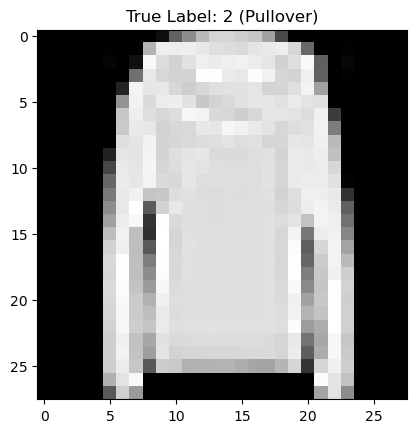


--- predict_image called ---
Debug: Input type: <class 'PIL.Image.Image'>
Debug: Image mode after convert: L, size: (28, 28)
Debug: Image resized to: (28, 28)
Debug: NumPy shape after resize: (28, 28), dtype: float32, min: 0.0, max: 255.0
Debug: Image normalized. New min: 0.0, max: 1.0
Debug: Image inverted (numpy). New min: 0.0, max: 1.0
Debug: NumPy array shape after reshape: (28, 28)
Debug: Final batch shape for prediction: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Debug: Raw predictions (numpy): [7.3540129e-02 6.4037731e-06 8.6806279e-01 1.0263816e-06 1.5648212e-06
 6.6584768e-08 5.8047142e-02 8.9063093e-07 1.6386899e-04 1.7613450e-04]
Debug: Predicted Label: Pullover, Confidence: 0.8681
Debug: Returning string: 'Prediction: Pullover (Confidence: 0.87)'

Prediction Results for X_test[0]:
Prediction: Pullover (Confidence: 0.87)
--- End of direct test ---


In [54]:
# Cell 3: Test the Function Directly (Updated for String Output)

print("\n--- Testing predict_image function with an image from X_test ---")
try:
    # Take the first image from the test set (already normalized, shape (28, 28))
    test_image_np = X_test[0] # Make sure X_test is defined from your data split

    # Convert NumPy array to PIL Image
    if test_image_np.max() <= 1.0:
        test_image_pil = Image.fromarray((test_image_np * 255).astype(np.uint8))
    else:
         test_image_pil = Image.fromarray(test_image_np.astype(np.uint8))

    # Show the original test image
    plt.imshow(X_test[0], cmap='gray')
    plt.title(f"True Label: {y_test[0]} ({class_names[y_test[0]]})") # Make sure y_test is defined
    plt.show()

    # Call the prediction function
    test_prediction_output = predict_image(test_image_pil)

    # --- UPDATED RESULT HANDLING ---
    print("\nPrediction Results for X_test[0]:")
    # Simply print the string returned by the function
    print(test_prediction_output)
    # --- END OF UPDATED HANDLING ---

except NameError as ne:
     print(f"Error during direct test: Required variable not defined (e.g., X_test, y_test). Details: {ne}")
     traceback.print_exc()
except Exception as e:
    print(f"Error during direct test: {e}")
    traceback.print_exc()
print("--- End of direct test ---")

In [56]:
# Cell 4: Create and Launch the Gradio Interface (Textbox Output)

image_input = gr.Image(type="pil", label="Upload Clothing Image")
# Ensure output is Textbox
text_output = gr.Textbox(label="Prediction")

interface = gr.Interface(
    fn=predict_image,
    inputs=image_input,
    outputs=text_output, # Use Textbox output
    title="Fashion MNIST Classifier",
    description="Upload an image of a single clothing item (like T-shirt, bag, boot) to classify it. Ensure the item is clear and somewhat centered.",
    examples=[]
)

# Launch the interface
interface.launch(debug=True)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.



--- predict_image called ---
Debug: Input type: <class 'PIL.Image.Image'>
Debug: Image mode after convert: L, size: (754, 519)
Debug: Image resized to: (28, 28)
Debug: NumPy shape after resize: (28, 28), dtype: float32, min: 21.0, max: 255.0
Debug: Image normalized. New min: 0.08235294371843338, max: 1.0
Debug: Image inverted (numpy). New min: 0.0, max: 0.9176470637321472
Debug: NumPy array shape after reshape: (28, 28)
Debug: Final batch shape for prediction: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Debug: Raw predictions (numpy): [9.9962631e-07 9.1797904e-07 4.9751006e-06 3.2409794e-08 7.3633736e-08
 1.4728792e-07 3.9569368e-06 9.4349939e-01 4.1365112e-07 5.6489076e-02]
Debug: Predicted Label: Sneaker, Confidence: 0.9435
Debug: Returning string: 'Prediction: Sneaker (Confidence: 0.94)'

--- predict_image called ---
Debug: Input type: <class 'PIL.Image.Image'>
Debug: Image mode after convert: L, size: (915, 1050)
Debug: Image resized to: (28, 28)
Debug: NumPy shape after re